# Проект: "Анализ данных сервиса проката самокатов"

**В проекте проанализированы данные сервиса проката самокатов, а именно: информация о пользователях из нескольких городов и об их поездках. Проверен ряд гипотез, которые могут помочь сервису зарабатывать больше. На момент выгрузки данных, клиенты сервиса могли использовать его двумя способами:**

**1. Без подписки - free.** При этом абонентская плата отсутствует, минута поездки стоит 8 рублей, стоимость старта - 50 рублей.

**2. По подписке - ultra.** Абонентская плата - 199 руб/месяц, минута поездки стоит 6 рублей, старт бесплатный.


**Данные представлены тремя датасетами:**

**1. Пользователи** - `users.csv`, в котором содержится информация о:

`user_id` - уникальном идентификаторе пользователя

`name` - имени пользователя

`age` - возрасте

`city` - городе

`subscription_type` - типе подписки (free, ultra)

**2. Поездки** - `rides.csv` с данными о:

`user_id` - уникальном идентификаторе пользователя

`distance` - расстоянии, которое пользователь проехал в текущей сессии (в метрах)

`duration` - продолжительности сессии (в минутах) — время с того момента, как пользователь нажал кнопку «Начать поездку» до момента, как он нажал кнопку «Завершить поездку»

`date` - дате совершения поездки

**3. Подписки** - `subscriptions.csv`. Содержит информацию о:

`subscription_type` - типе подписки

`minute_price` - стоимости одной минуты поездки по данной подписке

`start_ride_price` - стоимости начала поездки

`subscription_fee` - стоимости ежемесячного платежа


**План выполнения проекта:**

1. Ознакомиться с данными в предоставленных датасетах, проверить, что они содержат заявленную информацию
2. Выполнить предобработку данных - проверить на наличие пропусков, явных и неявных дубликатов
3. Провести исследовательский анализ данных: 
- Оценить частоту встречаемости городов в датасете `users`;
- Вычислить соотношение пользователей, которые пользуются сервисом с подпиской и без подписки;
- Проверить как распределены пользователи сервиса по возрастам;
- Оценить распределение длительности поездок
4. Выполнить объединение данных из датасетов `users`, `rides` и `subscriptions` и создать отдельные таблицы данных для пользователей с подпиской и без нее. Используя подготовленные таблицы, оценить расстояние и время поездок в обеих группах.
5. Выполнить подсчет выручки, предварительно создав сводные таблицы, содержащие данные о помесячной выручке для каждого клиента.
6. Проверить гипотезы о том, что:
- пользователи с подпиской тратят больше времени на поездки, чем пользователи без подписки; 
- расстояние, которое проезжают пользователи с подпиской за одну поездку не превышает 3130 метров;
- помесячная выручка от пользователей с подпиской по месяцам выше, чем от пользователей без подписки.
+ ответить на вопрос о том, какой статистический тест можно использовать для оценки того, снизилось ли количество обращений пользователей в техподдержку после обновления сервера.
7. Дать ответы на вопросы о том:

- какое минимальное количество промокодов на бесплатную месячную подписку нужно раздать, чтобы с вероятностью 95% или больше как минимум 100 человек продлили бы подписку (при условии, что вероятность продления подписки пользователем, получившим промокод, 10%)

- какова вероятность того, что из 1 млн разосланных push-уведомлений будет открыто не более 399.5 тыс уведомлений (при условии, что вероятность открытия уведомления 40%)

8. Сделать выводы по результатм проекта


## Первичный анализ датасетов

**Импортируем библиотеки, необходимые для работы:**

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats as st
from math import factorial
from math import sqrt
from scipy.stats import binom

import warnings
warnings.filterwarnings("ignore")

**Загрузим данные из csv-файлов в датафреймы с названиями `users` ,`rides` и `subscriptions`:**

In [2]:
users = pd.read_csv('/datasets/users.csv')

In [3]:
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1565 entries, 0 to 1564
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   user_id            1565 non-null   int64 
 1   name               1565 non-null   object
 2   age                1565 non-null   int64 
 3   city               1565 non-null   object
 4   subscription_type  1565 non-null   object
dtypes: int64(2), object(3)
memory usage: 61.3+ KB


In [4]:
rides = pd.read_csv('/datasets/rides.csv')

In [5]:
rides.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18068 entries, 0 to 18067
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   user_id   18068 non-null  int64  
 1   distance  18068 non-null  float64
 2   duration  18068 non-null  float64
 3   date      18068 non-null  object 
dtypes: float64(2), int64(1), object(1)
memory usage: 564.8+ KB


In [6]:
subscriptions = pd.read_csv('/datasets/subscriptions.csv')

In [7]:
subscriptions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   subscription_type  2 non-null      object
 1   minute_price       2 non-null      int64 
 2   start_ride_price   2 non-null      int64 
 3   subscription_fee   2 non-null      int64 
dtypes: int64(3), object(1)
memory usage: 192.0+ bytes


**Датафреймы сформированы и, судя по их описанию, в них нет пропущенных значений. На этапе пердобработки необходимо будет проверить их на наличие явных и неявных дубликатов, а пока посмотрим на первые несколько строк каждого из датафреймов:**

In [8]:
users.head()

,user_id,name,age,city,subscription_type
0,1,Кира,22,Тюмень,ultra
1,2,Станислав,31,Омск,ultra
2,3,Алексей,20,Москва,ultra
3,4,Константин,26,Ростов-на-Дону,ultra
4,5,Адель,28,Омск,ultra


**Выглядит красиво, и все даже упорядочено по `user_id`**

In [9]:
rides.head()

,user_id,distance,duration,date
0,1,4409.919140,25.599769,2021-01-01
1,1,2617.592153,15.816871,2021-01-18
2,1,754.159807,6.232113,2021-04-20
3,1,2694.783254,18.511000,2021-08-11
4,1,4028.687306,26.265803,2021-08-28


**Судя по всему, расстояние записано в метрах, длительность поездки в минутах. Дата записана, как тип `object`. При предобработке нужно будет привести ее к типу даты pandas**

In [10]:
subscriptions.head()

,subscription_type,minute_price,start_ride_price,subscription_fee
0,free,8,50,0
1,ultra,6,0,199


**Здесь все правильно:** 

**free - без абоненткой платы, старт - 50 рублей, цена минуты - 8 рублей** 

**ultra - абонентская плата 199 руб/месяц, старт - бесплатно, цена минуты - 6 рублей**

## Предобработка данных

### Предобработка данных о дате поездки в датафрейме `rides`

**Приведем столбец `date` датафрейма `rides` к типу даты pandas:**

In [11]:
rides['date'] = pd.to_datetime(rides['date'], format = '%Y-%m-%d')

In [12]:
rides.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18068 entries, 0 to 18067
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   user_id   18068 non-null  int64         
 1   distance  18068 non-null  float64       
 2   duration  18068 non-null  float64       
 3   date      18068 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(2), int64(1)
memory usage: 564.8 KB


**Посмотрим, данные за какой промежуток времени представлены в датафрейме `rides`:** 

In [13]:
print(rides['date'].min())
print(rides['date'].max())

2021-01-01 00:00:00
2021-12-30 00:00:00


**Данные за весь 2021 год без одного дня - 31 декабря**

**Создадим в датафрейме `rides` новый столбец с данными о том, в каком месяце была совершена конкретная поездка:**

In [14]:
rides['month'] = rides['date'].dt.month

In [15]:
rides.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18068 entries, 0 to 18067
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   user_id   18068 non-null  int64         
 1   distance  18068 non-null  float64       
 2   duration  18068 non-null  float64       
 3   date      18068 non-null  datetime64[ns]
 4   month     18068 non-null  int64         
dtypes: datetime64[ns](1), float64(2), int64(2)
memory usage: 705.9 KB


### Проверка датафреймов на пропущенные значения и дубликаты

**Сначала проверим, есть ли пропущенные значения:**

In [16]:
users.isna().sum()

user_id              0
name                 0
age                  0
city                 0
subscription_type    0
dtype: int64

In [17]:
rides.isna().sum()

user_id     0
distance    0
duration    0
date        0
month       0
dtype: int64

**Проверим, есть ли явные дубликаты в датафреймах:**

In [18]:
rides.duplicated().sum()

0

In [19]:
users.duplicated().sum()

31

**В датафрейме `users` обнаружились полностью дублирующие друг-друга строки. Уберем их:**

In [20]:
users = users.drop_duplicates().reset_index(drop = True)
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1534 entries, 0 to 1533
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   user_id            1534 non-null   int64 
 1   name               1534 non-null   object
 2   age                1534 non-null   int64 
 3   city               1534 non-null   object
 4   subscription_type  1534 non-null   object
dtypes: int64(2), object(3)
memory usage: 60.0+ KB


**Строчек в датафрейме стало на 31 меньше. Проверим, что явных дубликатов не осталось:**

In [21]:
users.duplicated().sum()

0

**Теперь проверим нет неявных дубликатов в столбцах датафрейма `users` с названием города и типом подписки:**

In [22]:
users['city'].unique()

array(['Тюмень', 'Омск', 'Москва', 'Ростов-на-Дону', 'Краснодар',
       'Пятигорск', 'Екатеринбург', 'Сочи'], dtype=object)

In [23]:
users['subscription_type'].unique()

array(['ultra', 'free'], dtype=object)

**Проверим, нет ли дубликатов в `user_id`**

In [24]:
user_ids = users['user_id'].unique()
len(set(user_ids))

1534

**Дубликатов в `user_id` нет. Проверять столбцы `name` и `age` на дубликаты не имеет смылса, поскольку и в том и в другом столбце данные могут повторяться - могут быть два человека с одним именем или одного возраста**

## Исследовательский анализ данных

### Частота встречаемости городов

**По датафрейму `users` оценим, сколько людей из предоставленной выборки пользуется услугами GoFast в каждом из представленных городов. Для этого создадим сводную таблицу:**

In [25]:
city_pivot = users.pivot_table(index='city', values='user_id', aggfunc='count')
city_pivot.columns = ['number_of_users']

**Чтобы вычислить частоту встречаемости городов раздедим число пользователей в каждом городе на общее число пользователей в выборке:**

In [26]:
city_pivot = city_pivot/len(users)

**Отсортируем по убыванию:**

In [27]:
city_pivot = city_pivot.sort_values(by='number_of_users', ascending=False)
city_pivot

,number_of_users
city,
Пятигорск,0.142764
Екатеринбург,0.132986
Ростов-на-Дону,0.129074
Краснодар,0.125815
Сочи,0.123207
Омск,0.119296
Тюмень,0.117340
Москва,0.109518


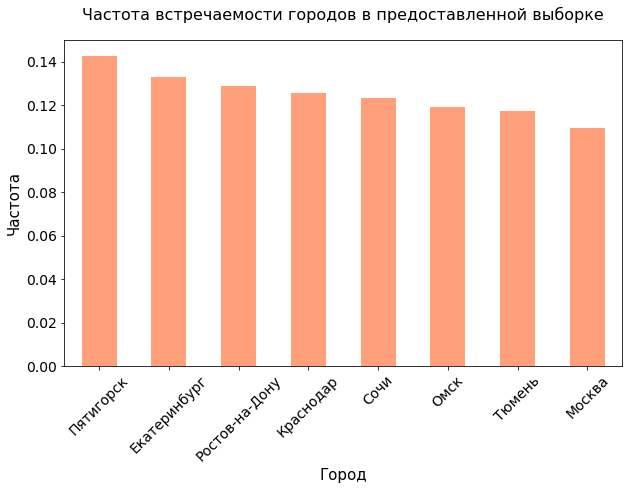

In [28]:
city_pivot.plot(y='number_of_users', kind='bar', color='lightsalmon', legend=None, figsize=(10,6))
plt.title(label='Частота встречаемости городов в предоставленной выборке', loc='center', fontsize=16, fontweight='regular', pad=20)
plt.ylabel('Частота', fontsize=15)
plt.xlabel('Город', fontsize=15)
plt.xticks(rotation=45, fontsize=14)
plt.yticks(fontsize=14)
plt.show()

**Получается, что доли пользователей из каждого города в выборке находятся в диапазоне от 10 до 14 %. Тут можно сделать два предположения - так специально была сделана выборка данных, или же у компании действительно не сильно различается число пользователей в огромной Москве и сравнительно небольшом Пятигорске.**  

### Соотношение пользователей с подпиской и без подписки

**Посчитаем, сколько пользователей подписались на тариф ultra, а сколько катаются на самокатах без подписки:**

In [29]:
subscription_pivot = users.pivot_table(index='subscription_type', values='user_id', aggfunc='count')
subscription_pivot.columns = ['number_of_users']
subscription_pivot

,number_of_users
subscription_type,
free,835
ultra,699


**Разделим полученные значения на общее число пользователей:**

In [30]:
subscription_pivot = subscription_pivot/len(users)
subscription_pivot.columns = ['users_share']
subscription_pivot

,users_share
subscription_type,
free,0.544329
ultra,0.455671


**Построим столбчатую гистограмму:**

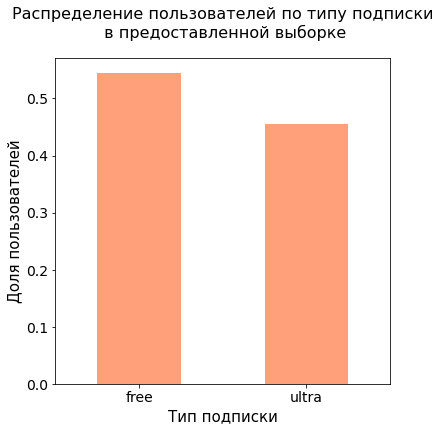

In [31]:
subscription_pivot.plot(y='users_share', kind='bar', color='lightsalmon', legend=None, figsize=(6,6))
plt.title(label='Распределение пользователей по типу подписки\n в предоставленной выборке', loc='center', fontsize=16, fontweight='regular', pad=20)
plt.ylabel('Доля пользователей', fontsize=15)
plt.xlabel('Тип подписки', fontsize=15)
plt.xticks(rotation=0, fontsize=14)
plt.yticks(fontsize=14)
plt.show()

**Среди пользователей около 54% пользуются опцией free и около 46% - подпиской ultra** 

### Возраст пользователей

**Посмотрим каково распределение пользователей GoFast по возрасту. Для этого сначала оценим основные параметры данных в столбце `age`:**

In [32]:
users['age'].describe()

count    1534.000000
mean       24.903520
std         4.572367
min        12.000000
25%        22.000000
50%        25.000000
75%        28.000000
max        43.000000
Name: age, dtype: float64

**Средний возраст клиента GoFast 25 лет, минимальный - 12 лет, максимальный - 43 года. Медиана совпадает со средним, значит можно ожидать относительно симметричное распределение по возрастам. Построим гистограмму:**

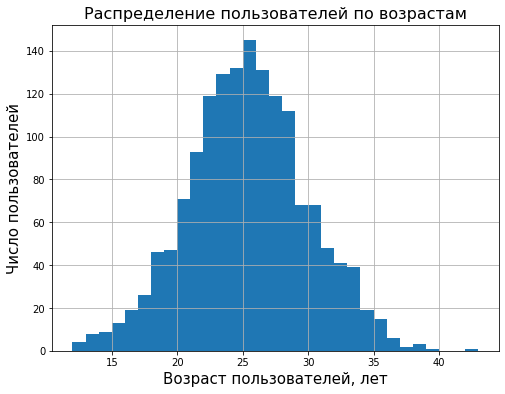

In [33]:
users['age'].hist(bins=31, range=(12,43), figsize=(8,6))
plt.xlabel('Возраст пользователей, лет', fontsize=15)
plt.ylabel('Чиcло пользователей', fontsize=15)
plt.title('Распределение пользователей по возрастам', fontsize=16)
plt.show()

**Распределение пользователей по возрастам имеет форму нормального: центр распределения находится в точке с возрастом 25 лет. Основную массу пользователей составляют люди в возрасте от 20 до 30 лет.**

### Расстояние, которое пользователь преодолел за одну поездку

**Посмотрим как распределены поездки по расстоянию, которое преодолевает пользователь сервиса за один раз:**

In [34]:
rides['distance'].describe()

count    18068.000000
mean      3070.659976
std       1116.831209
min          0.855683
25%       2543.226360
50%       3133.609994
75%       3776.222735
max       7211.007745
Name: distance, dtype: float64

**Средняя поездка - 3070 метров, максимальная 7221 м, минимальная - меньше метра. Опять-таки, среднее мало отличается от медианы, что указывает на симметричность распределения. Построим его:**

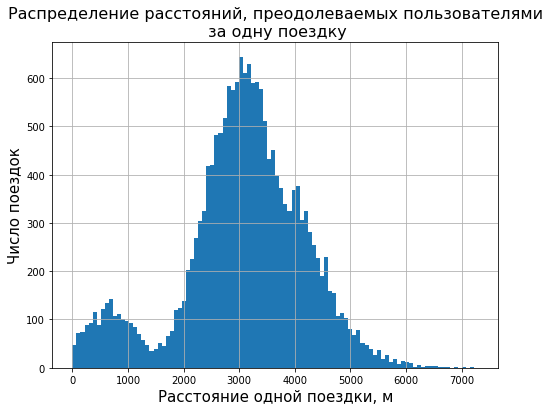

In [35]:
rides['distance'].hist(bins=100, range=(0,7300), figsize=(8,6))
plt.xlabel('Расстояние одной поездки, м', fontsize=15)
plt.ylabel('Чиcло поездок', fontsize=15)
plt.title('Распределение расстояний, преодолеваемых пользователями\n за одну поездку', fontsize=16)
plt.show()

**Распределение имеет два пика: один большой, соответствующий расстоянию поездки около 3000 м, и один маленький, с пиком в районе 600 метров. Можно предположить, что все поездки делятся на два типа - длинные и короткие и каждый из пиков отражает средние значения для первых и вторых. Короткие поездки могут быть пробными заездами, а также поездками от дома до магазина и т.п.**  

### Продолжительность поездок

**Теперь изучим, каково распределение поездок по продолжительности:**

In [36]:
rides['duration'].describe()

count    18068.000000
mean        17.805011
std          6.091051
min          0.500000
25%         13.597563
50%         17.678395
75%         21.724800
max         40.823963
Name: duration, dtype: float64

**Средняя поездка длится немногим менее 18 минут. Самая короткая около 30 секунд, самая длинная - почти 41 минуту. 75% поездок длятся не больше 22 минут. Теперь посмотрим на распределение:**

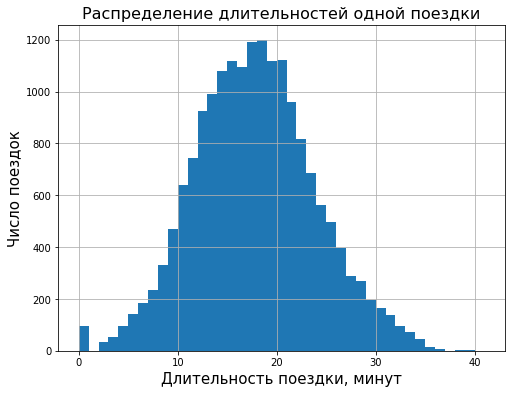

In [37]:
rides['duration'].hist(bins=41, range=(0,41), figsize=(8,6))
plt.xlabel('Длительность поездки, минут', fontsize=15)
plt.ylabel('Чиcло поездок', fontsize=15)
plt.title('Распределение длительностей одной поездки', fontsize=16)
plt.show()

**Распределение длительностей выглядит как типичное нормальное распределение с центром на 18 минутах. Есть выделяющийся небольшой пичок с заездами длительностью до 1 минуты. Скорее всего это пробные заезды или заезды начатые/законченные по ошибке.**

## Объединение данных

### Создание общей таблицы данных

**Для удобства последующей работы с данными объединим датафреймы `users`, `rides` и `subscriptions` в один датафрейм `df`. Чтобы не потерять при объединениии данные о поездках, будем действовать следующим образом: сначала к датафрейму `rides` левым join-ом присоединим данные из `users` по столбцу `user_id`. Затем к получившемуся датафрейму присоединим данные из словаря `subscriptions` по столбцу `subscription_type`:**

In [38]:
df = rides.merge(users, on='user_id', how = 'left')

In [39]:
df

,user_id,distance,duration,date,month,name,age,city,subscription_type
0,1,4409.919140,25.599769,2021-01-01,1,Кира,22,Тюмень,ultra
1,1,2617.592153,15.816871,2021-01-18,1,Кира,22,Тюмень,ultra
2,1,754.159807,6.232113,2021-04-20,4,Кира,22,Тюмень,ultra
3,1,2694.783254,18.511000,2021-08-11,8,Кира,22,Тюмень,ultra
4,1,4028.687306,26.265803,2021-08-28,8,Кира,22,Тюмень,ultra
...,...,...,...,...,...,...,...,...,...
18063,1534,3781.098080,19.822962,2021-11-04,11,Альберт,25,Краснодар,free
18064,1534,2840.423057,21.409799,2021-11-16,11,Альберт,25,Краснодар,free
18065,1534,3826.185507,18.435051,2021-11-18,11,Альберт,25,Краснодар,free
18066,1534,2902.308661,16.674362,2021-11-27,11,Альберт,25,Краснодар,free


In [40]:
df = df.merge(subscriptions, on='subscription_type', how='left')

In [41]:
df

,user_id,distance,duration,date,month,name,age,city,subscription_type,minute_price,start_ride_price,subscription_fee
0,1,4409.919140,25.599769,2021-01-01,1,Кира,22,Тюмень,ultra,6,0,199
1,1,2617.592153,15.816871,2021-01-18,1,Кира,22,Тюмень,ultra,6,0,199
2,1,754.159807,6.232113,2021-04-20,4,Кира,22,Тюмень,ultra,6,0,199
3,1,2694.783254,18.511000,2021-08-11,8,Кира,22,Тюмень,ultra,6,0,199
4,1,4028.687306,26.265803,2021-08-28,8,Кира,22,Тюмень,ultra,6,0,199
...,...,...,...,...,...,...,...,...,...,...,...,...
18063,1534,3781.098080,19.822962,2021-11-04,11,Альберт,25,Краснодар,free,8,50,0
18064,1534,2840.423057,21.409799,2021-11-16,11,Альберт,25,Краснодар,free,8,50,0
18065,1534,3826.185507,18.435051,2021-11-18,11,Альберт,25,Краснодар,free,8,50,0
18066,1534,2902.308661,16.674362,2021-11-27,11,Альберт,25,Краснодар,free,8,50,0


In [42]:
df.isna().sum()

user_id              0
distance             0
duration             0
date                 0
month                0
name                 0
age                  0
city                 0
subscription_type    0
minute_price         0
start_ride_price     0
subscription_fee     0
dtype: int64

**Число записей о поездках после выполнения объединения не изменилось, пустых значений в новом датафрейме нет.**

### Отдельные таблицы для пользователей с подпиской и без

**Создадим отдельные датафреймы с пользователями без подписки `df_free` и с подпиской `df_ultra`:**

In [43]:
df_free = df.query('subscription_type == "free"')

In [44]:
df_free.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11568 entries, 6500 to 18067
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   user_id            11568 non-null  int64         
 1   distance           11568 non-null  float64       
 2   duration           11568 non-null  float64       
 3   date               11568 non-null  datetime64[ns]
 4   month              11568 non-null  int64         
 5   name               11568 non-null  object        
 6   age                11568 non-null  int64         
 7   city               11568 non-null  object        
 8   subscription_type  11568 non-null  object        
 9   minute_price       11568 non-null  int64         
 10  start_ride_price   11568 non-null  int64         
 11  subscription_fee   11568 non-null  int64         
dtypes: datetime64[ns](1), float64(2), int64(6), object(3)
memory usage: 1.1+ MB


In [45]:
df_free.head()

,user_id,distance,duration,date,month,name,age,city,subscription_type,minute_price,start_ride_price,subscription_fee
6500,700,2515.690719,14.944286,2021-01-02,1,Айдар,22,Омск,free,8,50,0
6501,700,846.932642,16.234663,2021-02-01,2,Айдар,22,Омск,free,8,50,0
6502,700,4004.434142,20.016628,2021-02-04,2,Айдар,22,Омск,free,8,50,0
6503,700,1205.911290,9.782872,2021-02-10,2,Айдар,22,Омск,free,8,50,0
6504,700,3047.379435,17.427673,2021-02-14,2,Айдар,22,Омск,free,8,50,0


In [46]:
df_ultra = df.query('subscription_type == "ultra"')

In [47]:
df_ultra.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6500 entries, 0 to 6499
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   user_id            6500 non-null   int64         
 1   distance           6500 non-null   float64       
 2   duration           6500 non-null   float64       
 3   date               6500 non-null   datetime64[ns]
 4   month              6500 non-null   int64         
 5   name               6500 non-null   object        
 6   age                6500 non-null   int64         
 7   city               6500 non-null   object        
 8   subscription_type  6500 non-null   object        
 9   minute_price       6500 non-null   int64         
 10  start_ride_price   6500 non-null   int64         
 11  subscription_fee   6500 non-null   int64         
dtypes: datetime64[ns](1), float64(2), int64(6), object(3)
memory usage: 660.2+ KB


In [48]:
df_ultra.head()

,user_id,distance,duration,date,month,name,age,city,subscription_type,minute_price,start_ride_price,subscription_fee
0,1,4409.919140,25.599769,2021-01-01,1,Кира,22,Тюмень,ultra,6,0,199
1,1,2617.592153,15.816871,2021-01-18,1,Кира,22,Тюмень,ultra,6,0,199
2,1,754.159807,6.232113,2021-04-20,4,Кира,22,Тюмень,ultra,6,0,199
3,1,2694.783254,18.511000,2021-08-11,8,Кира,22,Тюмень,ultra,6,0,199
4,1,4028.687306,26.265803,2021-08-28,8,Кира,22,Тюмень,ultra,6,0,199


**Датафреймы готовы. Поездок по подписке примерно на 40% меньше, чем без подписки**

### Расстояние и время поездок для пользователей с подпиской и без нее

**Сначала посмотрим как распределено расстояние поездки в обеих группах:**

In [49]:
df_free['distance'].describe()

count    11568.000000
mean      3045.495282
std       1246.173806
min          0.855683
25%       2366.562689
50%       3114.648465
75%       3905.697894
max       7211.007745
Name: distance, dtype: float64

In [50]:
df_ultra['distance'].describe()

count    6500.000000
mean     3115.445388
std       836.895330
min       244.210438
25%      2785.444017
50%      3148.637229
75%      3560.574425
max      5699.769662
Name: distance, dtype: float64

**По средним значениям расстояния в группах почти не различаются - 3028 и 3115 метров. Однако разброс расстояния одной поездки в группе `free` явно больше, чем в группе `ultra`. Построим распределения:**

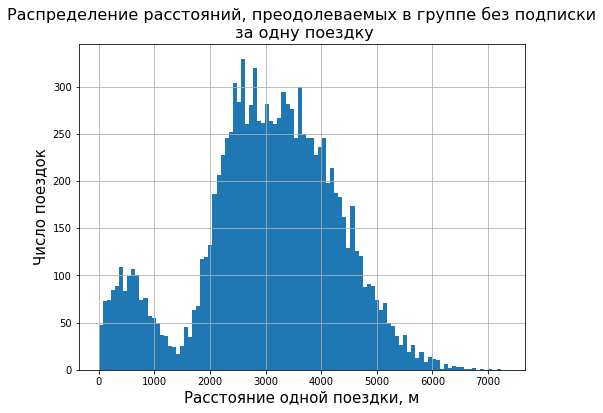

In [51]:
df_free['distance'].hist(bins=100, range=(0,7300), figsize=(8,6))
plt.xlabel('Расстояние одной поездки, м', fontsize=15)
plt.ylabel('Чиcло поездок', fontsize=15)
plt.title('Распределение расстояний, преодолеваемых в группе без подписки\n за одну поездку', fontsize=16)
plt.show()

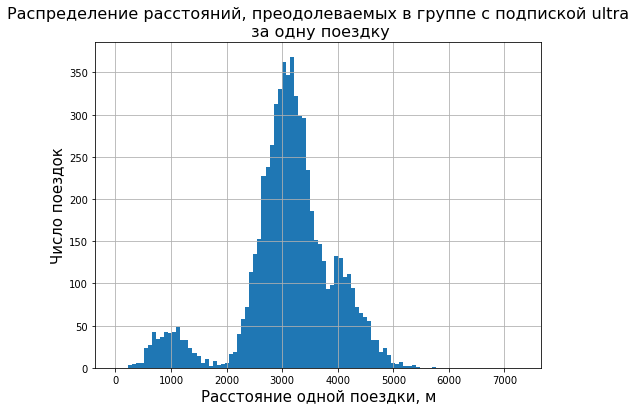

In [52]:
df_ultra['distance'].hist(bins=100, range=(0,7300), figsize=(8,6))
plt.xlabel('Расстояние одной поездки, м', fontsize=15)
plt.ylabel('Чиcло поездок', fontsize=15)
plt.title('Распределение расстояний, преодолеваемых в группе c подпиской ultra\n за одну поездку', fontsize=16)
plt.show()

**Распределения по расстоянию одной поездки в группах `free` и `ultra` выглядят по-разному. У пользователей без подписки распределение более широкое, и пик на малых расстояниях выше и смещен ближе к 0, по сравнению с пользователями с подпиской. Это логично, поскольку пробные заезды вероятнее всего будут совершать те, у кого еще нет подписки. У тех, кто оформил подписку на графике выделяется дополнительный пик около 4000 м** 

**Теперь обратимся к распределению поездок по времени. Еще до построения графика можно предположить, что среднее время заезда в группе без подписки будет ниже, чем в группе с подпиской (т.к. в первом случае минута самокатного времени стоит дороже)**

In [53]:
df_free['duration'].describe()

count    11568.000000
mean        17.390909
std          6.326803
min          0.500000
25%         12.958437
50%         17.326890
75%         21.594071
max         34.948498
Name: duration, dtype: float64

In [54]:
df_ultra['duration'].describe()

count    6500.000000
mean       18.541985
std         5.572048
min         3.760353
25%        14.524654
50%        18.178153
75%        21.884129
max        40.823963
Name: duration, dtype: float64

**Судя по описанию столбцов в первой и второй группе - разница небольшая. Посмотрим на распределения:** 

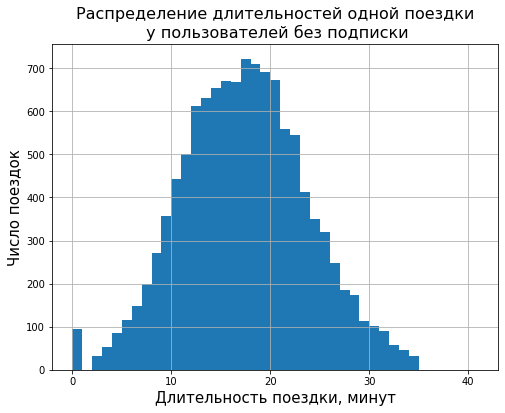

In [55]:
df_free['duration'].hist(bins=41, range=(0,41), figsize=(8,6))
plt.xlabel('Длительность поездки, минут', fontsize=15)
plt.ylabel('Чиcло поездок', fontsize=15)
plt.title('Распределение длительностей одной поездки\n у пользователей без подписки', fontsize=16)
plt.show()

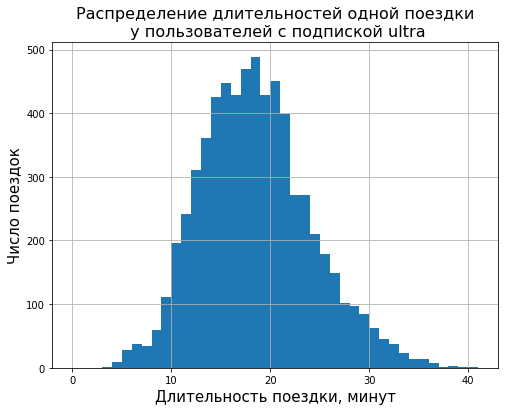

In [56]:
df_ultra['duration'].hist(bins=41, range=(0,41), figsize=(8,6))
plt.xlabel('Длительность поездки, минут', fontsize=15)
plt.ylabel('Чиcло поездок', fontsize=15)
plt.title('Распределение длительностей одной поездки\n у пользователей c подпиской ultra', fontsize=16)
plt.show()

**У пользователей без подписки распределение времени на поездку имеет симметричную колоколообразную форму, а поездки никогда не превышают 35 минут. Именно пользователи без подписки "ответственны" за маленький пик пробных поездок продолжительностью меньше минуты. У пользователей с подпиской распределение немного смещено вправо - они имеют тенденцию делать чуть меньше коротких по времени поездок. В отличие от пользователей без подписки они все-таки изредка совершают поездки длительностью больше 35 минут. Для наглядности построим распределения по длительности поездки в обеих группах на одном графике:**

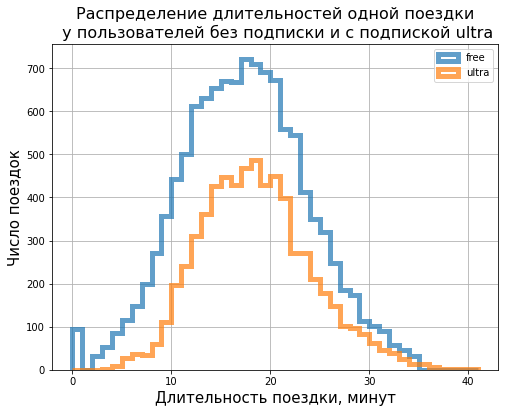

In [57]:
ax=df_free.plot(kind='hist', y='duration', histtype='step', range=(0,41), bins=41, linewidth=5, alpha=0.7, label='free', figsize=(8,6))
df_ultra.plot(kind='hist', y='duration', histtype='step', range=(0,41), bins=41, linewidth=5, alpha=0.7, label='ultra', ax=ax, grid=True, legend = True)
plt.xlabel('Длительность поездки, минут', fontsize=15)
plt.ylabel('Чиcло поездок', fontsize=15)
plt.title('Распределение длительностей одной поездки\n у пользователей без подписки и c подпиской ultra', fontsize=16)
plt.show()

## Подсчет выручки

**Создадим сводную таблицу, в которой соберем данные о суммарном расстоянии, количестве поездок,суммарном времени для каждого пользователя за каждый месяц, а также о тарифе, которым он пользуется:**

In [58]:
df_grouped = df.groupby(['user_id','month']).agg({'distance':'sum', 'user_id':'count', 'duration':'sum', 'subscription_type':'first'})
df_grouped.columns = ['distance','rides','duration', 'subscription_type']

In [59]:
df_grouped

distance  rides   duration subscription_type
user_id month                                                  
1       1       7027.511294      2  41.416640             ultra
        4        754.159807      1   6.232113             ultra
        8       6723.470560      2  44.776802             ultra
        10      5809.911100      2  31.578017             ultra
        11      7003.499363      3  53.397424             ultra
...                     ...    ...        ...               ...
1534    6       3409.468534      2  24.812678              free
        8       7622.453034      2  47.205960              free
        9       4928.173852      1  22.560373              free
        11     13350.015305      4  76.342174              free
        12      2371.711192      1  15.893917              free

[11331 rows x 4 columns]

**Округлим значения `duration` в таблице `df_grouped` до верхнего целого числа:**

In [60]:
df_grouped['duration'] = np.ceil(df_grouped['duration'])

**Создадим функцию, которая на основе данных из `df_grouped` будет подсчитывать доход, который принес компании каждый пользователеь за каждый месяц года с учетом того, пользуется он подпиской или нет:**

In [61]:
def revenue(row):
    if row['subscription_type'] == 'ultra': # условие, если пользователь на подписке
        rev = 6*row['duration'] + 199
        return rev
    else: # условие, если пользователь без подписки 
        rev=row['rides']*50 + 8*row['duration']
        return rev

In [62]:
df_grouped['revenue']=df_grouped.apply(revenue, axis=1)
df_grouped

distance  rides  duration subscription_type  revenue
user_id month                                                          
1       1       7027.511294      2      42.0             ultra    451.0
        4        754.159807      1       7.0             ultra    241.0
        8       6723.470560      2      45.0             ultra    469.0
        10      5809.911100      2      32.0             ultra    391.0
        11      7003.499363      3      54.0             ultra    523.0
...                     ...    ...       ...               ...      ...
1534    6       3409.468534      2      25.0              free    300.0
        8       7622.453034      2      48.0              free    484.0
        9       4928.173852      1      23.0              free    234.0
        11     13350.015305      4      77.0              free    816.0
        12      2371.711192      1      16.0              free    178.0

[11331 rows x 5 columns]

**Просуммируем числа в столбце `revenue`, чтобы рассчитать суммарную выручку за год:**

In [63]:
revenue = df_grouped['revenue'].sum()
revenue

3853677.0

## Проверка гипотез

### Гипотеза 1. Пользователи с подпиской тратят больше времени на поездки, чем пользователи без подписки

**Воспользуемся статистическим тестом, который в качестве нулевой гипотезы предполагает равенство средних значений времени, а в качестве альтернативной гипотезы предполагает, что среднее время у пользователей с подпиской больше чем у пользователей без подписки. Параметр variance зададим как False, поскольку, судя по распределениям времени на поездку в двух группах, дисперсия должна различаться, и размер выборок разный:**  

In [64]:
results_1 = st.ttest_ind(df_ultra['duration'],df_free['duration'], equal_var=False, alternative='greater')
results_1.pvalue

5.675781377128977e-37

**Получили очень низкое значение p-value, которое позволяет нам отвергнуть нулевую гипотезу в пользу альтернативной. Отсюда можем заключить, что пользователи с подпиской действительно тратят больше времени на поездки, чем пользователи без подписки. Это время отличается примерно на 1 минуту**

### Гипотеза 2. Расстояние, которое проезжают пользователи с подпиской за одну поездку не превышает 3130 метров.

**Применим одновыборочный t-тест с альтернативной гипотезой о том, что среднее расстояние за поездку больше чем 3130:**

In [65]:
results_2 = st.ttest_1samp(df_ultra['distance'], 3130, alternative='greater')
results_2.pvalue

0.9195368847849785

**Получили p-value ~0.92. Т.е. мы принимаем нулевую гипотезу, что расстояние, которое проезжают самокаты за одну поездку не отличается от оптимального**

### Гипотеза 3. Помесячная выручка от пользователей с подпиской по месяцам выше, чем выручка от пользователей без подписки. 

**Эта гипотеза состоит из множества подгипотез о том, что в конкретный месяц года выручка от пользователей с подпиской больше чем от пользователей без подписки. Проверять эти подгипотезы будем, используя t-тест для независимых выборок. Поскольку размеры выборок разлмчаются, зададим параметр equal_var = False:**

**Нулевая гипотеза - в данном месяце выручка от пользователей с подпиской и без подписки не различается.** 

**Альтернативная гипотеза - в данном месяце выручка от пользователей с подпиской больше, чем от пользователей без подписки**

In [66]:
for i in range(1,13): # перебираем все месяцы года от 1 до 12
    first = df_grouped.query('month == @i and subscription_type == "ultra"') # формируем выборку за месяц из пользователей с подпиской
    second = df_grouped.query('month == @i and subscription_type == "free"') # формируем выборку за месяц из пользователей с без подписки
    results = st.ttest_ind(first['revenue'], second['revenue'], equal_var = False, alternative = 'greater') #t-тест
    if results.pvalue < 0.05:
        print(f'В {i} месяц года выручка от пользователей с подпиской достоверно БОЛЬШЕ, чем от пользователей без подписки. P={results.pvalue}')
    else:
        print(f'В {i} месяц года выручка от пользователей с подпиской НЕ ОТЛИЧАЕТСЯ от выручки от пользователей без подписки. P={results.pvalue}')

В 1 месяц года выручка от пользователей с подпиской достоверно БОЛЬШЕ, чем от пользователей без подписки. P=3.4489806571135315e-08
В 2 месяц года выручка от пользователей с подпиской достоверно БОЛЬШЕ, чем от пользователей без подписки. P=3.3279338263868713e-06
В 3 месяц года выручка от пользователей с подпиской достоверно БОЛЬШЕ, чем от пользователей без подписки. P=0.0029869416768279473
В 4 месяц года выручка от пользователей с подпиской достоверно БОЛЬШЕ, чем от пользователей без подписки. P=9.965487512646642e-05
В 5 месяц года выручка от пользователей с подпиской достоверно БОЛЬШЕ, чем от пользователей без подписки. P=1.6862422270517686e-06
В 6 месяц года выручка от пользователей с подпиской достоверно БОЛЬШЕ, чем от пользователей без подписки. P=8.143231568748623e-06
В 7 месяц года выручка от пользователей с подпиской достоверно БОЛЬШЕ, чем от пользователей без подписки. P=5.220158041297512e-06
В 8 месяц года выручка от пользователей с подпиской достоверно БОЛЬШЕ, чем от пользоват

**Создадим таблицу со средними значениями выручки для клиентов без подписки и с подпиской по месяцам:**

In [67]:
revenue_month = df_grouped.pivot_table(index='month',columns = 'subscription_type',values = 'revenue', aggfunc='mean')

In [68]:
revenue_month

subscription_type,free,ultra
month,,
1,320.603333,367.953846
2,310.971645,351.033898
3,333.881295,358.772727
4,332.611212,365.844920
5,325.190227,367.029630
6,323.409168,360.155779
7,326.615658,366.400000
8,328.148673,359.625000
9,332.928943,362.994366


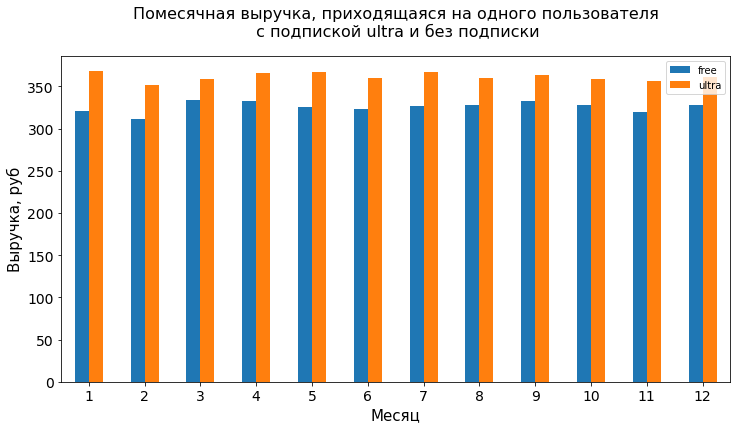

In [69]:
revenue_month.plot(kind='bar', figsize=(12,6), )
plt.title(label='Помесячная выручка, приходящаяся на одного пользователя\n с подпиской ultra и без подписки', loc='center', fontsize=16, fontweight='regular', pad=20)
plt.ylabel('Выручка, руб', fontsize=15)
plt.xlabel('Месяц', fontsize=15)
plt.xticks(rotation=0, fontsize=14)
plt.yticks(fontsize=14)
plt.legend(loc='best')
plt.show()

**Статистический тест и график показывают, что в действительности помесячная выручка от пользователей с подпиской выше, чем от пользователей без подписки. Рассчитаем среднюю разницу в выручке от клиентов с подписко и без нее:**

In [70]:
(revenue_month['ultra']-revenue_month['free']).mean()

35.56436417603317

## Расчет минимального необходимого числа промокодов и вероятности открытия push-уведомлений

### Сколько промокодов на бесплатный месяц подписки нужно раздать, чтобы с вероятностью 95% или больше как минимум 100 человек продлили бы эту подписку?

**Отделу маркетинга поставили задачу: нужно провести акцию с раздачей промокодов на один бесплатный месяц подписки, в рамках которой как минимум 100 существующих клиентов должны продлить эту подписку. То есть по завершении периода действия подписки пользователь может либо отказаться от неё, либо продлить, совершив соответствующий платёж. Эта акция уже проводилась ранее и по итогу выяснилось, что после бесплатного пробного периода подписку продлевают 10 % пользователей. Необходимо выяснить, какое минимальное количество промокодов нужно разослать, чтобы вероятность не выполнить план была примерно 5 %**

**В данном случае выдача промокода является экспериментом Бернулли в результате которого с вероятностью 10% произойдет успех, т.е. пользователь продлит подписку, а с вероятностью 90% - неудача (пользователь не станет продлевать подписку). Результат множества таких экспериментов описывается биномиальным распределением. Нам нужно найти такое число промокодов (n) раздача которого приведет к тому, что вероятность подписаться для 99 и менее пользователей будет не более 5%. Для начала попробуем вычислить вероятность такого события, если раздадим 1000 промокодов:** 

In [71]:
p = 0.1 # вероятность продления подписки
n = 1000 # число промокодов

distr = binom(n,p) #задаем биномиальное распределение с параметрами n и p

distr.cdf(99) # вычисляем вероятность, что подпишутся менее 100 человек

0.4845822904340791

**Вероятность больше 48%. Не подходит. Попробуем увеличить n до 1200:**

In [72]:
p = 0.1 # вероятность продления подписки
n = 1200 # число промокодов

distr = binom(n,p) #задаем биномиальное распределение с параметрами n и p

distr.cdf(99)

0.022042798349797568

**При увеличении числа промокодов с 1000 до 1200, вероятность того, что подпишутся менее 100 человек снизилась до 2%. Методом подбора находим число промокодов такое, чтобы эта вероятность была чуть меньше 5%:**

In [73]:
p = 0.1 # вероятность продления подписки
n = 1161 # число промокодов

distr = binom(n,p) #задаем биномиальное распределение с параметрами n и p

distr.cdf(99)

0.04976090094990249

**Таким образом, чтобы с вероятностью 95% продлили подписку не менее 100 человек, нужно раздать не менее чем 1161 промокод.**

### Оценить вероятность того, что из 1 млн разосланных push-уведомлений будет открыто не более 399,5 тыс. уведомлений

**Отдел маркетинга рассылает клиентам push-уведомления в мобильном приложении. Клиенты могут открыть его или не открывать. Известно, что уведомления открывают около 40 % получивших клиентов. Отдел планирует разослать 1 млн уведомлений. С помощью аппроксимации постройте примерный график распределения и оцените вероятность того, что уведомление откроют не более 399,5 тыс. пользователей**

**Чтобы решить эту задачу выполним аппроксимацию биномиального распределения нормальным. Это допустимо, поскольку число уведомлений (т.е.число независимых испытаний Бернулли) очень велико, а вероятность открыть push-уведомление достаточно близка к 50%.** 

In [74]:
n = 1000000 # количество уведомлений 
p = 0.4 #еероятность, что уведомление будет открыто

# Вычислим математическое ожидание и стандартное отклонение для нашего биномиального распределения

mu = n*p
sigma = sqrt(n*p*(1-p))

# Зададим нормальное распределение с такими же параметрами:

distr = st.norm(mu,sigma)

# Вычислим вероятность, что уведомление откроют не более 399.5 тыс пользователей:

distr.cdf(399500)

0.15371708296369768

**Вероятность того, что push-уведомления откроют не более 399.5 тыс пользователей составляет ~ 15.4%**

## Вывод

**В проекте выполнен анализ данных, предоставленных сервисом проката самокатов и проверен ряд гипотез, которые могут помочь компании достичь более высоких показателей.**

**Проанализированный датасет включает данные о более чем 18 тыс поездок около 1.5 тыс клиентов из 8-ми городов. Доли клиентов в этих городах распределены относительно равномерно: от 11 до 14 %.**


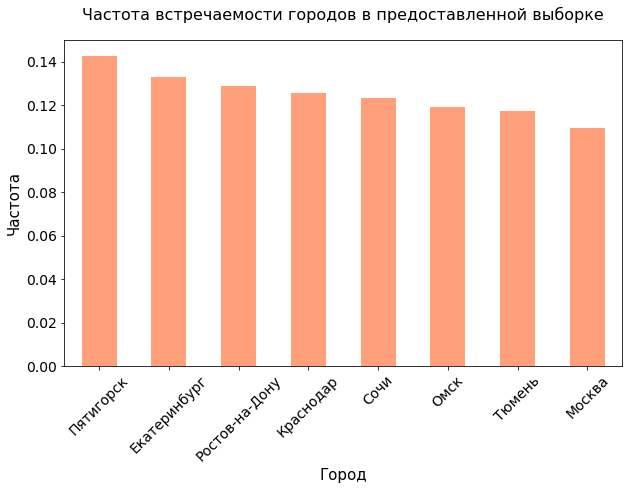

In [75]:
city_pivot.plot(y='number_of_users', kind='bar', color='lightsalmon', legend=None, figsize=(10,6))
plt.title(label='Частота встречаемости городов в предоставленной выборке', loc='center', fontsize=16, fontweight='regular', pad=20)
plt.ylabel('Частота', fontsize=15)
plt.xlabel('Город', fontsize=15)
plt.xticks(rotation=45, fontsize=14)
plt.yticks(fontsize=14)
plt.show()

- **54.4% клиентов пользуются сервисом без подписки. 45.6 % оформили подписку ultra.**

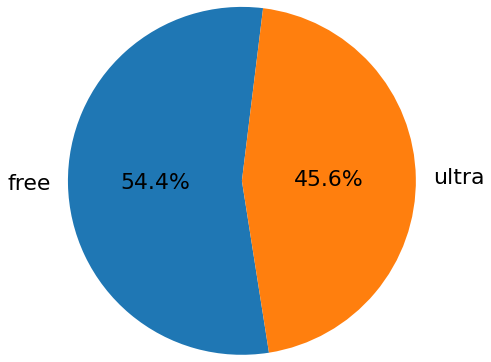

In [76]:
plt.pie(subscription_pivot['users_share'], labels=subscription_pivot.index, autopct='%1.1f%%', radius=2.0, pctdistance=0.5, labeldistance=1.1, textprops={'fontsize': 22}, startangle = 83)
plt.show()

- **У сервиса достаточно молодая аудитория. Средний возраст пользователей составляет 25 лет, самому молодому клиенту в выборке - 12 лет, а самому старшему 43 года**

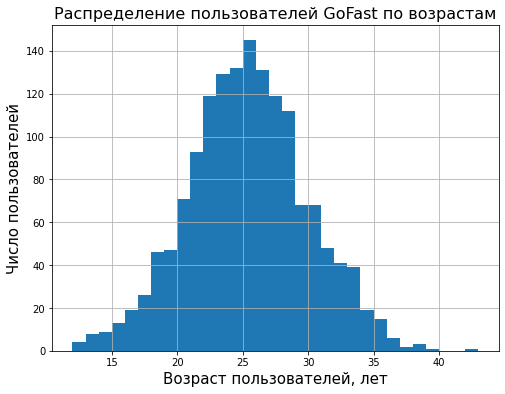

In [77]:
users['age'].hist(bins=31, range=(12,43), figsize=(8,6))
plt.xlabel('Возраст пользователей, лет', fontsize=15)
plt.ylabel('Чиcло пользователей', fontsize=15)
plt.title('Распределение пользователей GoFast по возрастам', fontsize=16)
plt.show()

- **В среднем за одну поездку пользователи преодолевают расстояние 3070 метров, при этом время такой поездки составляет около 18 минут**

- **Среднее время поездки у пользователей без подписки (17.4 минуты) меньше, чем у подписчиков (18.5 минут). Разница около 5%, но она достоверна.**

- **Для пользователей с подпиской ultra среднее расстояние на одну поездку достоверно не отличается от оптимального расстояния в 3130 м**

- **Помесячная выручка от пользователей с подпиской достоверно выше, чем выручка от пользователей без подписки. В среднем пользователь с подпиской каждый месяц приносит компании на 35.6 рублей больше, чем пользователь без подписки**

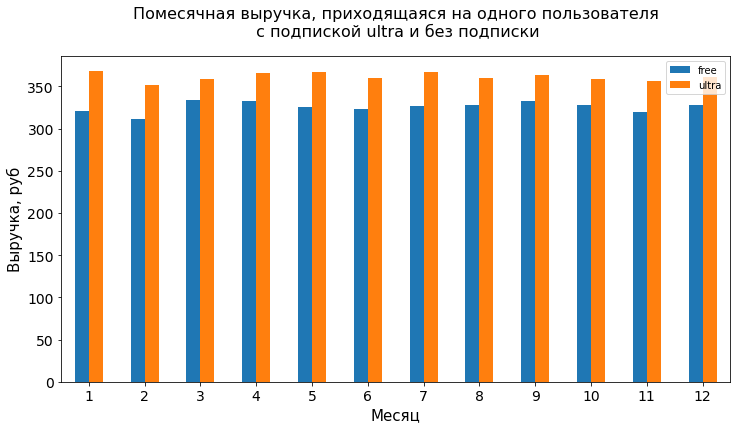

In [78]:
revenue_month.plot(kind='bar', figsize=(12,6), )
plt.title(label='Помесячная выручка, приходящаяся на одного пользователя\n с подпиской ultra и без подписки', loc='center', fontsize=16, fontweight='regular', pad=20)
plt.ylabel('Выручка, руб', fontsize=15)
plt.xlabel('Месяц', fontsize=15)
plt.xticks(rotation=0, fontsize=14)
plt.yticks(fontsize=14)
plt.legend(loc='best')
plt.show()

- **Для того, чтобы не менее 100 человек продлили ultra подписку после получения промокода, компании необходимо раздать не менее чем 1161 промокод (при вероятности продления подписки 10%)** 

- **При рассылке 1 млн push-уведомлений и вероятности открытия уведомления 40%, вероятность того, что будет открыто не более 399.5 тыс уведомлений составляет ~15.4%**